# About
The dataset describes 24,675 rows of up-to-date information on tourist expenditure collected by the National Bureau of Statistics (NBS) in Tanzania.The dataset was collected to gain a better understanding of the status of the tourism sector and provide an instrument that will enable sector growth.

Your goal is to accurately classify the range of expenditures a tourist spends in Tanzania.

The majority of the visitors under the age group of 25-44 came for business (18.5%), or leisure and holidays (53.2%), which is consistent with the fact that they are economically more productive. Those at the age group of 45-64 were more prominent in holiday making and visiting friends and relatives. The results further reveal that most visitors belonging to the age group of 18-24 came for leisure and holidays (55.3%) as well as volunteering (13.7%). The majority of senior citizens (65 and above) came for leisure and holidays (80.9%) and visiting friends and relatives (9.5%).

The survey covers seven departure points, namely: Julius Nyerere International Airport, Kilimanjaro International Airport, Abeid Amani Karume International Airport, and the Namanga, Tunduma, Mtukula and Manyovu border points.

# Import the Neccessary Packages

In [99]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.offline as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly.io as pio
import plotly.express as px

# import graphing

# import mglearn

# Importing dataset

In [100]:
Test = pd.read_csv('Test.csv')
Train =pd.read_csv('Train.csv')
Train.head(6)

,Tour_ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz,cost_category
0,tour_id1hffseyw,ITALY,45-64,With Children,0.0,2.0,Visiting Friends and Relatives,Beach Tourism,"Friends, relatives",Package Tour,...,Yes,Yes,Yes,No,No,No,0,7,Yes,High Cost
1,tour_idnacd7zag,UNITED KINGDOM,25-44,With Spouse,1.0,1.0,Leisure and Holidays,Wildlife Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,No,No,0,7,Yes,High Cost
2,tour_id62vz7e71,UNITED STATES OF AMERICA,65+,With Spouse,1.0,1.0,Leisure and Holidays,Widlife Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,Yes,No,6,6,Yes,Higher Cost
3,tour_idrc76tzix,RWANDA,25-44,With Spouse and Children,3.0,1.0,Leisure and Holidays,Beach Tourism,"Radio, TV, Web",Independent,...,No,No,No,No,No,No,3,0,No,Lower Cost
4,tour_idn723m0n9,UNITED STATES OF AMERICA,45-64,Alone,0.0,1.0,Leisure and Holidays,Widlife Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,Yes,Yes,7,0,Yes,Higher Cost
5,tour_id8aylf7ba,FRANCE,25-44,With Spouse,1.0,1.0,Leisure and Holidays,Widlife Tourism,"Newspaper, magazines, brochures",Package Tour,...,Yes,Yes,No,No,No,No,14,7,Yes,High Cost


EDA
Understand the type of data.
Check if there are any biases in your dataset.

In [101]:
print(' The shape of the Train is ;')
Train.shape

 The shape of the Train is ;


(18506, 21)

In [102]:
print(' Whiles Test have a shape of;')
Test.shape


 Whiles Test have a shape of;


(6169, 20)

In [103]:
Train.info

<bound method DataFrame.info of                Tour_ID                   country age_group  \
0      tour_id1hffseyw                     ITALY     45-64   
1      tour_idnacd7zag            UNITED KINGDOM     25-44   
2      tour_id62vz7e71  UNITED STATES OF AMERICA       65+   
3      tour_idrc76tzix                    RWANDA     25-44   
4      tour_idn723m0n9  UNITED STATES OF AMERICA     45-64   
...                ...                       ...       ...   
18501  tour_idmp5ciw50                     KENYA     45-64   
18502  tour_ideq0yncfs                     KENYA     45-64   
18503  tour_idv7pz3vs8  UNITED STATES OF AMERICA     25-44   
18504  tour_idy6ydo00w  UNITED STATES OF AMERICA     25-44   
18505  tour_idceoq9por                      OMAN     25-44   

                    travel_with  total_female  total_male  \
0                 With Children           0.0         2.0   
1                   With Spouse           1.0         1.0   
2                   With Spouse         

In [104]:
#List the columns for different datatypes:
print('List of all Columns: ')
print(Train.columns)
print('\n')
print('Integer Type: ')
Col_int = Train.select_dtypes(np.int64).columns
print(Col_int)
print('\n')
print('Float Type: ')
Col_float = Train.select_dtypes(np.float64).columns
print(Col_float)
print('\n')
print('Object Type: ')
Col_cat = Train.select_dtypes(np.object).columns
print(Col_cat)
print('\n')
print('Count:')
print(Train.dtypes.value_counts())

List of all Columns: 
Index(['Tour_ID', 'country', 'age_group', 'travel_with', 'total_female',
       'total_male', 'purpose', 'main_activity', 'info_source',
       'tour_arrangement', 'package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance', 'night_mainland',
       'night_zanzibar', 'first_trip_tz', 'cost_category'],
      dtype='object')


Integer Type: 
Index(['night_mainland', 'night_zanzibar'], dtype='object')


Float Type: 
Index(['total_female', 'total_male'], dtype='object')


Object Type: 


C:\Users\Guy\AppData\Local\Temp/ipykernel_13036/1391781545.py:14: DeprecationWarning:

`np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



Index(['Tour_ID', 'country', 'age_group', 'travel_with', 'purpose',
       'main_activity', 'info_source', 'tour_arrangement',
       'package_transport_int', 'package_accomodation', 'package_food',
       'package_transport_tz', 'package_sightseeing', 'package_guided_tour',
       'package_insurance', 'first_trip_tz', 'cost_category'],
      dtype='object')


Count:
object     17
float64     2
int64       2
dtype: int64


In [105]:
# Let take a look at the Object Type

Train.select_dtypes('object').head()

,Tour_ID,country,age_group,travel_with,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,first_trip_tz,cost_category
0,tour_id1hffseyw,ITALY,45-64,With Children,Visiting Friends and Relatives,Beach Tourism,"Friends, relatives",Package Tour,Yes,Yes,Yes,Yes,No,No,No,Yes,High Cost
1,tour_idnacd7zag,UNITED KINGDOM,25-44,With Spouse,Leisure and Holidays,Wildlife Tourism,"Travel agent, tour operator",Package Tour,Yes,Yes,Yes,Yes,No,No,No,Yes,High Cost
2,tour_id62vz7e71,UNITED STATES OF AMERICA,65+,With Spouse,Leisure and Holidays,Widlife Tourism,"Travel agent, tour operator",Package Tour,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Higher Cost
3,tour_idrc76tzix,RWANDA,25-44,With Spouse and Children,Leisure and Holidays,Beach Tourism,"Radio, TV, Web",Independent,No,No,No,No,No,No,No,No,Lower Cost
4,tour_idn723m0n9,UNITED STATES OF AMERICA,45-64,Alone,Leisure and Holidays,Widlife Tourism,"Travel agent, tour operator",Package Tour,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Higher Cost


# Note
----------------------------------------------------------------
The majority of the visitors under the age group of 25-44 came for business (18.5%), or leisure and holidays (53.2%), which is consistent with the fact that they are economically more productive. Those at the age group of 45-64 were more prominent in holiday making and visiting friends and relatives. The results further reveal that most visitors belonging to the age group of 18-24 came for leisure and holidays (55.3%) as well as volunteering (13.7%). The majority of senior citizens (65 and above) came for leisure and holidays (80.9%) and visiting friends and relatives (9.5%).
# Let Varify that
-------------------------------------------------------------------------------------------------------------------------------------------------

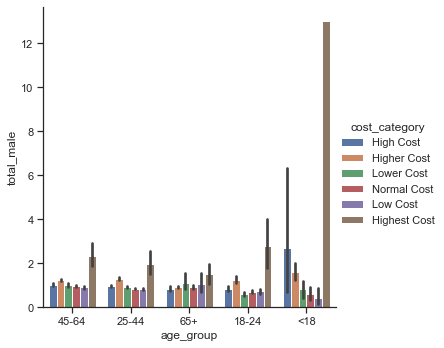

In [106]:

sns.catplot(x="age_group", y="total_male", hue="cost_category", kind="bar", data=Train)

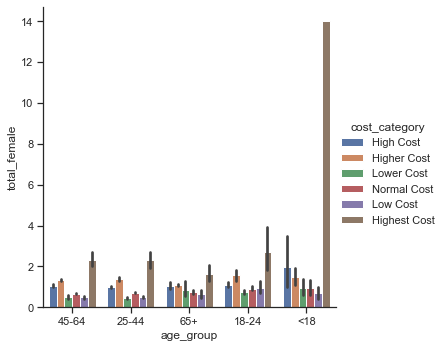

In [107]:

sns.catplot(x="age_group", y="total_female", hue="cost_category", kind="bar", data=Train)

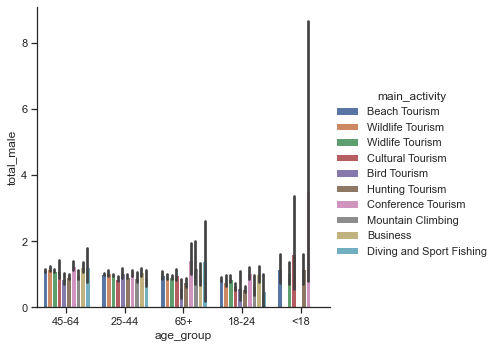

In [108]:

sns.catplot(x="age_group", y="total_male", hue="main_activity", kind="bar", data=Train)

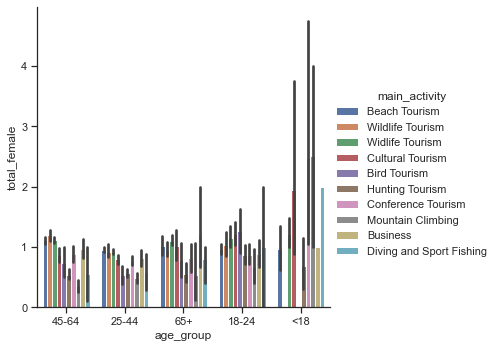

In [109]:
sns.catplot(x="age_group", y="total_female", hue="main_activity", kind="bar", data=Train)

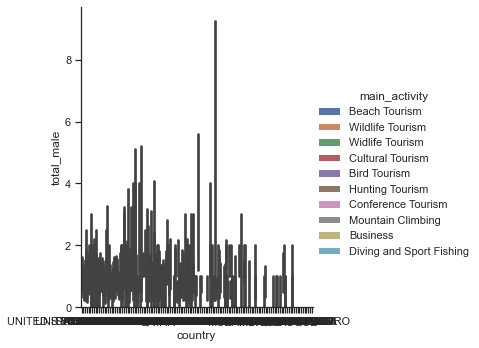

In [110]:

sns.catplot(x="country", y="total_male", hue="main_activity", kind="bar", data=Train)
sns.set(rc = {'figure.figsize':(20,10)})


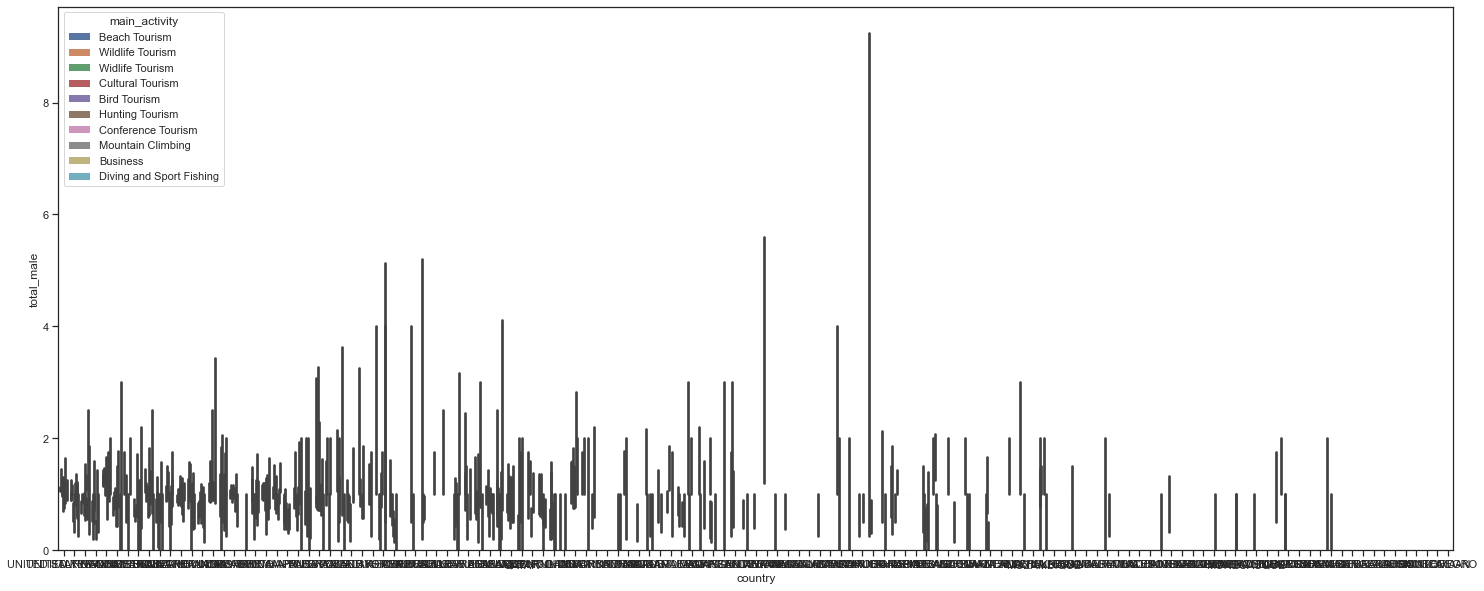

In [111]:
sns.set_style('ticks')
fig,ax = plt.subplots()

fig.set_size_inches(25,10)
sns.barplot(x="country", y="total_male", hue="main_activity",  data=Train, ax=ax)

fig.savefig("plot.png")

In [112]:
Train.age_group.value_counts()

25-44    9047
45-64    5648
18-24    2222
65+      1467
<18       122
Name: age_group, dtype: int64

Preparing Data
Count how many null values are existing in columns.

Clearn Data Remove null value rows of the target variable.

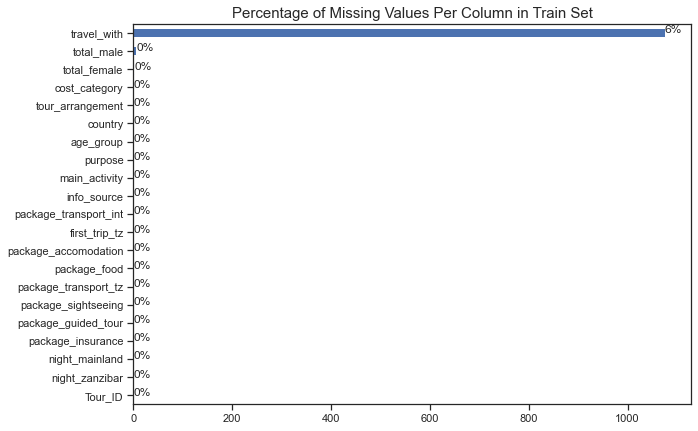

In [113]:
# Check if there any missing values in train set
ax = Train.isna().sum().sort_values().plot(kind = 'barh', figsize = (10, 7))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/Train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

# Clearn And Transform the Data

In [114]:
Obj_df = Train.select_dtypes('object')
columns=[*Obj_df.columns]
unique_values={}
for i in columns:
    unique_values[i]=Obj_df[i].unique()
unique=pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in unique_values.items() ]))
unique.fillna('')

,Tour_ID,country,age_group,travel_with,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,first_trip_tz,cost_category
0,tour_id1hffseyw,ITALY,45-64,With Children,Visiting Friends and Relatives,Beach Tourism,"Friends, relatives",Package Tour,Yes,Yes,Yes,Yes,No,No,No,Yes,High Cost
1,tour_idnacd7zag,UNITED KINGDOM,25-44,With Spouse,Leisure and Holidays,Wildlife Tourism,"Travel agent, tour operator",Independent,No,No,No,No,Yes,Yes,Yes,No,Higher Cost
2,tour_id62vz7e71,UNITED STATES OF AMERICA,65+,With Spouse and Children,Business,Widlife Tourism,"Radio, TV, Web",,,,,,,,,,Lower Cost
3,tour_idrc76tzix,RWANDA,18-24,Alone,Scientific and Academic,Cultural Tourism,"Newspaper, magazines, brochures",,,,,,,,,,Normal Cost
4,tour_idn723m0n9,FRANCE,<18,,Meetings and Conference,Bird Tourism,Others,,,,,,,,,,Low Cost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18501,tour_idmp5ciw50,,,,,,,,,,,,,,,,
18502,tour_ideq0yncfs,,,,,,,,,,,,,,,,
18503,tour_idv7pz3vs8,,,,,,,,,,,,,,,,
18504,tour_idy6ydo00w,,,,,,,,,,,,,,,,


In [115]:
y = Train.select_dtypes('object')

In [116]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()


In [ ]:
def CleanData(cell):
 if (cell=="n.a."  or cell=="-1" or cell=="not avilable"):
     
   return 'Alone'
         
 return cell

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.base import BaseEstimator,TransformerMixin


class EncodeCategorical(BaseEstimator, TransformerMixin):
    """
    Encodes a specified list of columns or all columns if None.
    """

    def __init__(self, columns=None):
        self.columns  = [col for col in columns]
        self.encoders = None

    def fit(self, data, target=None):
        """
        Expects a data frame with named columns to encode.
        """
        # Encode all columns if columns is None
        if self.columns is None:
            self.columns = data.columns

        # Fit a label encoder for each column in the data frame
        self.encoders = {
            column: LabelEncoder().fit(data[column])
            for column in self.columns
        }
        return self

    def transform(self, data):
        """
        Uses the encoders to transform a data frame.
        """
        output = data.copy()
        for column, encoder in self.encoders.items():
            output[column] = encoder.transform(data[column])

        return output

# Modeling and Evaluation
# Common metrics for evaluating classifiers
Precision is the number of correct positive results divided by the number of all positive results (e.g. How many of the mushrooms we predicted would be edible actually were?).

Recall is the number of correct positive results divided by the number of positive results that should have been returned (e.g. How many of the mushrooms that were poisonous did we accurately predict were poisonous?).

The F1 score is a measure of a test’s accuracy. It considers both the precision and the recall of the test to compute the score. The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst at 0.

# Feature Seclection for Train Data

In [ ]:
Train = Train.drop([""])
X = Train.iloc[:,0:20]  #independent columns
y = Train.iloc[:,-1]    #target column i.e price range





# Feature Importance

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# Heatmap

In [ ]:
#get correlations of each features in dataset
corrmat = Train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(Train[top_corr_features].corr(),annot=True,cmap="RdYlGn")